## Demo: Yeast Segmentation

In [12]:
import sys
import os
sys.path.append("../")

import yaml
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

from config_yml import ExperimentOptions
from trainer.train import DeepCellModule
from postprocess.post_process_utils import post_process_panoptic

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 01. Config

In [2]:
mode = 'test' #train, evl, test
model_dir = "../../model_dir/"
config_path = "../configs/config_wl.yaml"
num_gpus=1

### 02. Load Model

In [3]:
with open(config_path, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
configs = ExperimentOptions(config)
configs.model_options.backbone.drop_path_keep_prob=1

cellmodel = DeepCellModule(mode, model_dir, configs, num_gpus)

2023-01-02 00:25:01.317020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 00:25:05.793323: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38224 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0


DEEPLAB INIT
DEEPLAB INIT (33, 33)
Setting pooling size to %s (33, 33)
restoring or initializing model...
restored model from ../../model_dir/ckpt-60000.
restored from checkpoint: ../../model_dir/ckpt-60000


### 03. Read Image

Test your picture here

In [38]:
file_path = "../../../data/Sj_MATECHOICE/20220524_yGL0154xyGL0360_VACfiltered_12_snapshot_R3D.dv_Composite.tif"
img = imread(file_path)

### 04. Prediction

In [39]:
%%time
output = cellmodel.predict(img[:,:,2])

norm
Getting pooling size to %s (None, None)
Eval with scales %s ListWrapper([1.0]) (None, None)
CPU times: user 2.03 s, sys: 282 ms, total: 2.32 s
Wall time: 813 ms


### 05. Plot result

In [36]:
post_ouput = output["panoptic_pred"][0].numpy()
post_ouput = post_process_panoptic(post_ouput)

In [37]:
imsave(os.path.join("../../../output/sj", os.path.basename(file_path)), post_ouput)

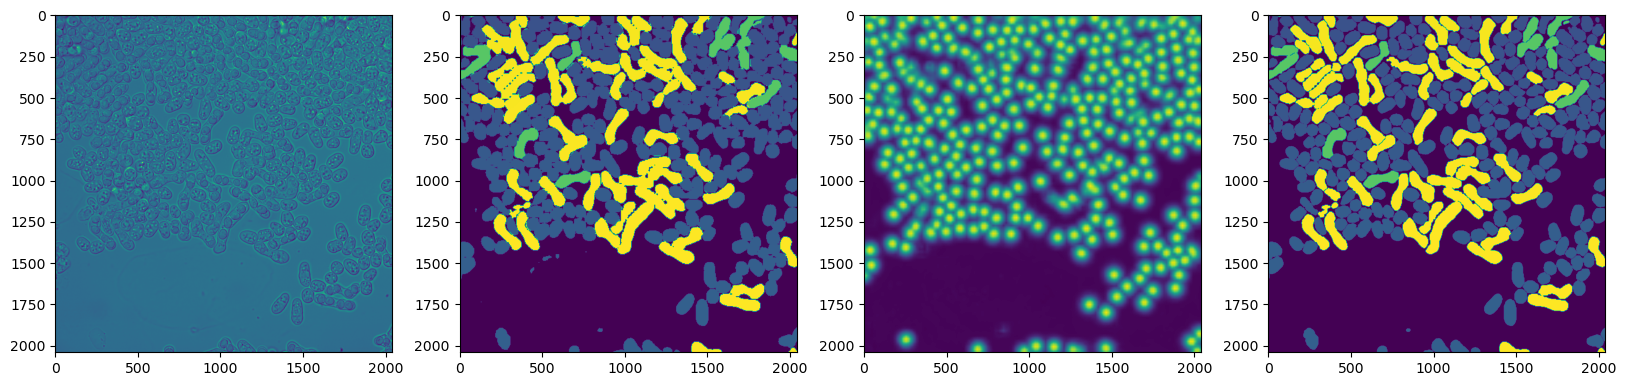

In [25]:
figs, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(img[:,:,2])
axs[1].imshow(output['panoptic_pred'][0])
axs[2].imshow(output['center_heatmap'][0])
axs[3].imshow(post_ouput)